In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [17]:
def myMonteCarlo(myParams,a,N):
    
    bolyongas = [[]for _ in range(len(myParams))] #listák listája a tárolásra
    n0 =a
    n=0
    for i in range(len(myParams)):
        nu=myParams[i] #aktuális személyre szabott érték beállítása
        j =0
        while j<N: #j=0,1,2,...N-1
            sorsolas=random.random(size=1) #valós szám sorsolása [0,1) intervallumból
                                            #egyenletes eloszlás alapján

            if sorsolas>=0.5:
                n0=n
                n+=1
                if 0.5*(n**2-n0**2)<0:
                    bolyongas[i].append(n)
                else:
                    P=random.random(size=1)
                    myExpVal=exp(-0.5*nu*(n**2-n0**2))
                    if P <myExpVal:
                        bolyongas[i].append(n)
                    else:
                        bolyongas[i].append(n0)


            else:
                n0=n
                n-=1
                if 0.5*(n**2-n0**2)<0:
                    bolyongas[i].append(n)
                else:
                    P=random.random(size=1)
                    myExpVal=exp(-0.5*nu*(n**2-n0**2))
                    if P <myExpVal:
                        bolyongas[i].append(n)

                    else:
                        bolyongas[i].append(n0) 
            
            j+=1
            
    return bolyongas

In [18]:
myParams = [0.07,0.16,0.64,0.90]

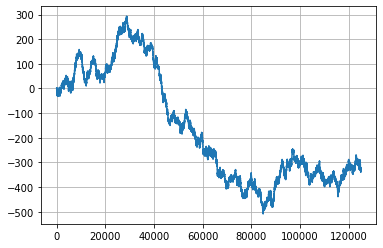

In [22]:
mySimulation =myMonteCarlo(myParams,666,125000)
plot(mySimulation[0])
grid()
savefig('test1.png')

In [23]:
a = 666
myMeansSquared= []
myMeanSquares= []
myVariances = []

for i in range(4):
    myMeansSquared.append((a*array([mySimulation[i]]).mean())**2)
    myMeanSquares.append(a**2*array([[l**2 for l in mySimulation[i]]]).mean())
    myVariances.append(myMeanSquares[i]-myMeansSquared[i])
    
myVariances

[22076645473.661053, 4412311281.450821, 13161809278.220947, 3582449129.0665283]

Text(0, 0.5, '$\\sigma^{2}$')

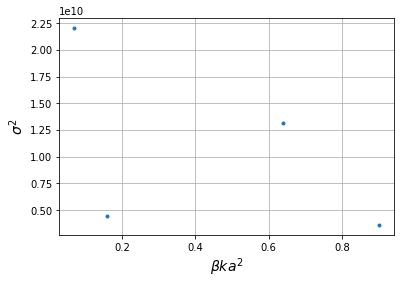

In [24]:
plot(myParams,myVariances,'.')
grid()
xlabel(r'$\beta k a^{2}$', fontsize=14)
ylabel(r'$\sigma^{2}$', fontsize=14)